In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as sm 
from statsmodels.formula.api import ols

from sklearn.externals import joblib

In [68]:
dataset = pd.read_csv("/content/auto-mpg .csv")

In [69]:
 pd.get_dummies(dataset, drop_first=True).shape

(398, 312)

In [70]:
dataset['car name'].value_counts().sort_values(ascending = False).head(20)

ford pinto                   6
amc matador                  5
ford maverick                5
toyota corolla               5
amc gremlin                  4
chevrolet impala             4
amc hornet                   4
toyota corona                4
chevrolet chevette           4
peugeot 504                  4
plymouth duster              3
chevrolet caprice classic    3
honda civic                  3
chevrolet citation           3
ford gran torino             3
volkswagen dasher            3
plymouth fury iii            3
dodge colt                   3
pontiac catalina             3
ford galaxie 500             3
Name: car name, dtype: int64

In [71]:
top_10 = [x for x in dataset['car name'].value_counts().sort_values(ascending = False).head(10).index ]
top_10

['ford pinto',
 'amc matador',
 'ford maverick',
 'toyota corolla',
 'amc gremlin',
 'chevrolet impala',
 'amc hornet',
 'toyota corona',
 'chevrolet chevette',
 'peugeot 504']

In [72]:
for label in top_10:
  dataset[label] = np.where(dataset['car name']==label,1,0)
dataset[['car name']+ top_10].head(40)

,car name,ford pinto,amc matador,ford maverick,toyota corolla,amc gremlin,chevrolet impala,amc hornet,toyota corona,chevrolet chevette,peugeot 504
0,chevrolet chevelle malibu,0,0,0,0,0,0,0,0,0,0
1,buick skylark 320,0,0,0,0,0,0,0,0,0,0
2,plymouth satellite,0,0,0,0,0,0,0,0,0,0
3,amc rebel sst,0,0,0,0,0,0,0,0,0,0
4,ford torino,0,0,0,0,0,0,0,0,0,0
5,ford galaxie 500,0,0,0,0,0,0,0,0,0,0
6,chevrolet impala,0,0,0,0,0,1,0,0,0,0
7,plymouth fury iii,0,0,0,0,0,0,0,0,0,0
8,pontiac catalina,0,0,0,0,0,0,0,0,0,0
9,amc ambassador dpl,0,0,0,0,0,0,0,0,0,0


In [73]:
def one_hot_top_x(df,variable, top_x_labels):
  for label in top_x_labels:
    df[variable+"_"+label] = np.where(dataset[variable]==label,1,0)
dataset = pd.read_csv("/content/auto-mpg .csv", usecols=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'],)
one_hot_top_x(dataset,"car name",top_20)
dataset.head()    

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car name_ford pinto,car name_amc matador,car name_ford maverick,car name_toyota corolla,car name_amc gremlin,car name_chevrolet impala,car name_amc hornet,car name_toyota corona,car name_chevrolet chevette,car name_peugeot 504,car name_plymouth duster,car name_chevrolet caprice classic,car name_honda civic,car name_chevrolet citation,car name_ford gran torino,car name_volkswagen dasher,car name_plymouth fury iii,car name_dodge colt,car name_pontiac catalina,car name_ford galaxie 500
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
 dataset = dataset.drop(['car name'],axis=1)

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   mpg                                 398 non-null    float64
 1   cylinders                           398 non-null    int64  
 2   displacement                        398 non-null    float64
 3   horsepower                          398 non-null    int64  
 4   weight                              398 non-null    int64  
 5   acceleration                        398 non-null    float64
 6   model year                          398 non-null    int64  
 7   origin                              398 non-null    int64  
 8   car name_ford pinto                 398 non-null    int64  
 9   car name_amc matador                398 non-null    int64  
 10  car name_ford maverick              398 non-null    int64  
 11  car name_toyota corolla             398 non-n

In [76]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name_ford pinto,car name_amc matador,car name_ford maverick,car name_toyota corolla,car name_amc gremlin,car name_chevrolet impala,car name_amc hornet,car name_toyota corona,car name_chevrolet chevette,car name_peugeot 504,car name_plymouth duster,car name_chevrolet caprice classic,car name_honda civic,car name_chevrolet citation,car name_ford gran torino,car name_volkswagen dasher,car name_plymouth fury iii,car name_dodge colt,car name_pontiac catalina,car name_ford galaxie 500
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.193467,2970.424623,15.568090,76.010050,1.572864,0.015075,0.012563,0.012563,0.012563,0.010050,0.010050,0.010050,0.010050,0.010050,0.010050,0.007538,0.007538,0.007538,0.007538,0.007538,0.007538,0.007538,0.007538,0.007538,0.007538
std,7.815984,1.701004,104.269838,38.345838,846.841774,2.757689,3.697627,0.802055,0.122006,0.111518,0.111518,0.111518,0.099871,0.099871,0.099871,0.099871,0.099871,0.099871,0.086601,0.086601,0.086601,0.086601,0.086601,0.086601,0.086601,0.086601,0.086601,0.086601
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,75.250000,2223.750000,13.825000,73.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,92.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
dataset.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name_ford pinto,car name_amc matador,car name_ford maverick,car name_toyota corolla,car name_amc gremlin,car name_chevrolet impala,car name_amc hornet,car name_toyota corona,car name_chevrolet chevette,car name_peugeot 504,car name_plymouth duster,car name_chevrolet caprice classic,car name_honda civic,car name_chevrolet citation,car name_ford gran torino,car name_volkswagen dasher,car name_plymouth fury iii,car name_dodge colt,car name_pontiac catalina,car name_ford galaxie 500
0,18.0,8,307.0,130,3504,12.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
dataset.isnull().values.any()

False

In [78]:
dataset.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name_ford pinto,car name_amc matador,car name_ford maverick,car name_toyota corolla,car name_amc gremlin,car name_chevrolet impala,car name_amc hornet,car name_toyota corona,car name_chevrolet chevette,car name_peugeot 504,car name_plymouth duster,car name_chevrolet caprice classic,car name_honda civic,car name_chevrolet citation,car name_ford gran torino,car name_volkswagen dasher,car name_plymouth fury iii,car name_dodge colt,car name_pontiac catalina,car name_ford galaxie 500
mpg,1.000000,-0.775396,-0.804203,-0.778774,-0.831741,0.420289,0.579267,0.563450,-0.009476,-0.112916,-0.053674,0.109894,-0.051818,-0.135718,-0.053432,0.043375,0.088874,0.000457,-0.020630,-0.085754,0.091011,0.036307,-0.096918,0.040772,-0.102501,0.042261,-0.098779,-0.102501
cylinders,-0.775396,1.000000,0.950721,0.843100,0.896017,-0.505419,-0.348746,-0.562543,-0.081668,0.089315,0.036200,-0.096588,0.032337,0.150956,0.032337,-0.086282,-0.086282,-0.086282,0.027969,0.130566,-0.074627,-0.006230,0.130566,-0.074627,0.130566,-0.074627,0.130566,0.130566
displacement,-0.804203,0.950721,1.000000,0.897273,0.932824,-0.543684,-0.370164,-0.609409,-0.072777,0.084239,0.028783,-0.097292,0.029340,0.188742,0.029340,-0.076606,-0.095473,-0.068382,0.003828,0.119872,-0.077626,-0.023230,0.104529,-0.087668,0.138282,-0.065910,0.188215,0.153625
horsepower,-0.778774,0.843100,0.897273,1.000000,0.864245,-0.687672,-0.417743,-0.453083,-0.066310,0.040663,-0.044159,-0.088926,-0.017610,0.186287,-0.019583,-0.051812,-0.107720,-0.054443,-0.020920,0.085273,-0.072500,0.001835,0.088307,-0.073258,0.153540,-0.040642,0.195259,0.145196
weight,-0.831741,0.896017,0.932824,0.864245,1.000000,-0.417457,-0.306564,-0.581024,-0.068934,0.091537,-0.005311,-0.097784,-0.026706,0.177276,-0.005263,-0.081685,-0.104856,0.006174,-0.002482,0.112407,-0.091440,-0.031368,0.119757,-0.087078,0.124738,-0.059464,0.156852,0.127520
acceleration,0.420289,-0.505419,-0.543684,-0.687672,-0.417457,1.000000,0.288137,0.205873,0.042609,0.000488,0.071747,0.028336,-0.029928,-0.139678,0.025861,-0.037245,0.081651,0.173109,0.013666,-0.071767,0.007338,-0.066493,-0.057001,-0.006373,-0.123449,-0.001100,-0.139270,-0.107628
model year,0.579267,-0.348746,-0.370164,-0.417743,-0.306564,0.288137,1.000000,0.180662,-0.067338,-0.067502,-0.073610,0.085213,-0.102589,-0.123051,-0.075305,-0.041200,0.047472,-0.027558,-0.086765,0.007629,0.031228,0.094157,-0.039568,-0.015970,-0.118230,0.015495,-0.086765,-0.118230
origin,0.563450,-0.562543,-0.609409,-0.453083,-0.581024,0.205873,0.180662,1.000000,-0.088476,-0.080665,-0.080665,0.200954,-0.072057,-0.072057,-0.072057,0.179510,-0.072057,0.053727,-0.062324,-0.062324,0.155264,-0.062324,-0.062324,0.046470,-0.062324,-0.062324,-0.062324,-0.062324
car name_ford pinto,-0.009476,-0.081668,-0.072777,-0.066310,-0.068934,0.042609,-0.067338,-0.088476,1.000000,-0.013955,-0.013955,-0.013955,-0.012466,-0.012466,-0.012466,-0.012466,-0.012466,-0.012466,-0.010782,-0.010782,-0.010782,-0.010782,-0.010782,-0.010782,-0.010782,-0.010782,-0.010782,-0.010782
car name_amc matador,-0.112916,0.089315,0.084239,0.040663,0.091537,0.000488,-0.067502,-0.080665,-0.013955,1.000000,-0.012723,-0.012723,-0.011365,-0.011365,-0.011365,-0.011365,-0.011365,-0.011365,-0.009830,-0.009830,-0.009830,-0.009830,-0.009830,-0.009830,-0.009830,-0.009830,-0.009830,-0.009830


Text(0, 0.5, 'frequency')

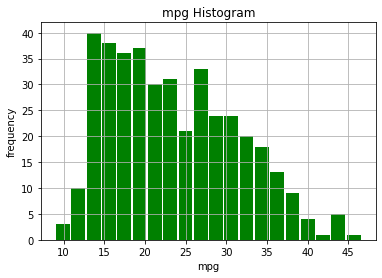

In [79]:
#mpg
dataset.iloc[:,0].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='green')
plt.title("mpg Histogram")
plt.xlabel("mpg")
plt.ylabel("frequency")

Text(0, 0.5, 'Frequency')

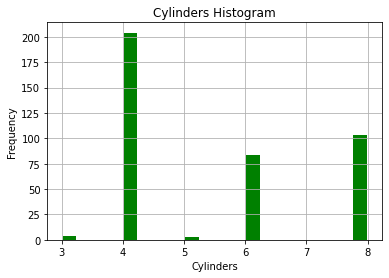

In [ ]:
#Cylinders
dataset.iloc[:,1].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='green')
plt.title("Cylinders Histogram")
plt.xlabel("Cylinders")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

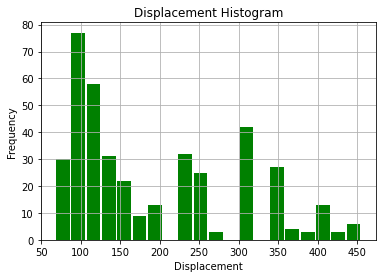

In [ ]:
#Displacement
dataset.iloc[:,2].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='green')
plt.title("Displacement Histogram")
plt.xlabel("Displacement")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

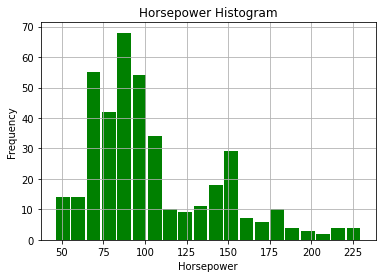

In [ ]:
#horsepower
dataset['horsepower'] = dataset['horsepower'].astype(float)
dataset.iloc[:,3].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='green')
plt.title("Horsepower Histogram")
plt.xlabel("Horsepower")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

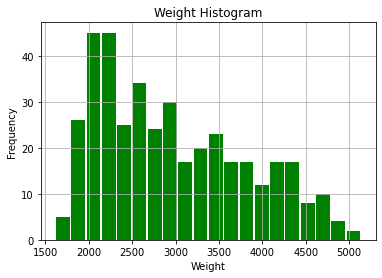

In [80]:
#Weight
dataset.iloc[:,4].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='green')
plt.title("Weight Histogram")
plt.xlabel("Weight")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

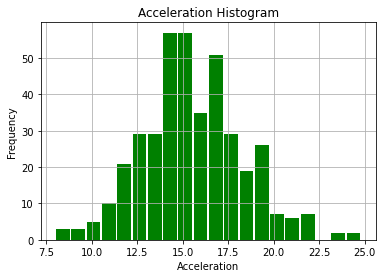

In [81]:
#Acceleration
dataset.iloc[:,5].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='green')
plt.title("Acceleration Histogram")
plt.xlabel("Acceleration")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

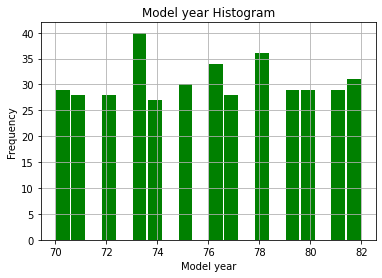

In [82]:
#Model Year
dataset.iloc[:,6].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='green')
plt.title("Model year Histogram")
plt.xlabel("Model year")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

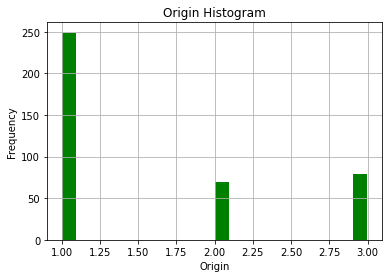

In [ ]:
#origin
dataset.iloc[:,7].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='green')
plt.title("Origin Histogram")
plt.xlabel("Origin")
plt.ylabel("Frequency")

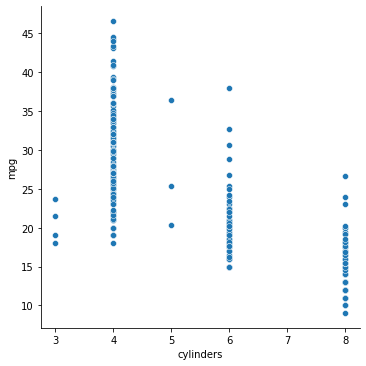

In [59]:
sns.relplot(x="cylinders",y="mpg", sizes = (40,400),data = dataset)

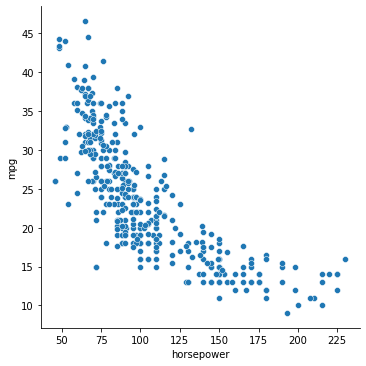

In [61]:
sns.relplot(x="horsepower",y="mpg", sizes = (40,400),data = dataset)

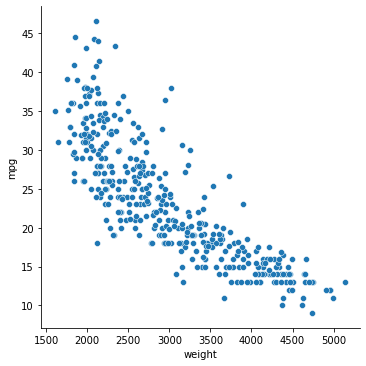

In [62]:
sns.relplot(x="weight",y="mpg", sizes = (40,400),data = dataset)

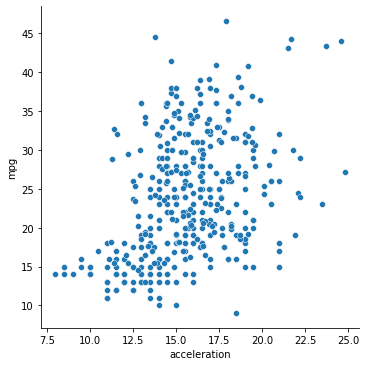

In [63]:
sns.relplot(x="acceleration",y="mpg", sizes = (40,400),data = dataset)

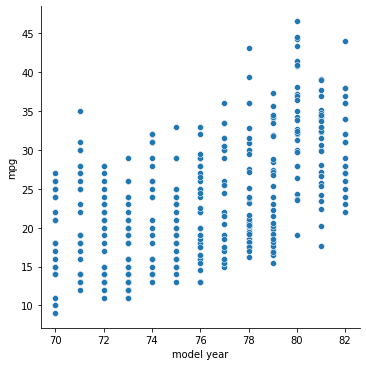

In [64]:
sns.relplot(x="model year",y="mpg", sizes = (40,400),data = dataset)

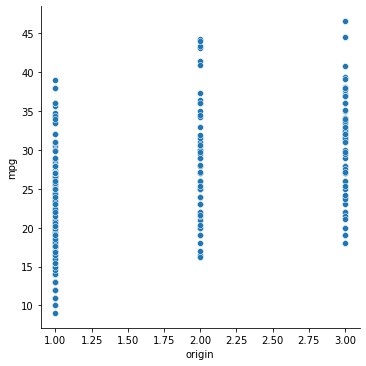

In [66]:
sns.relplot(x="origin",y="mpg", sizes = (40,400),data = dataset)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

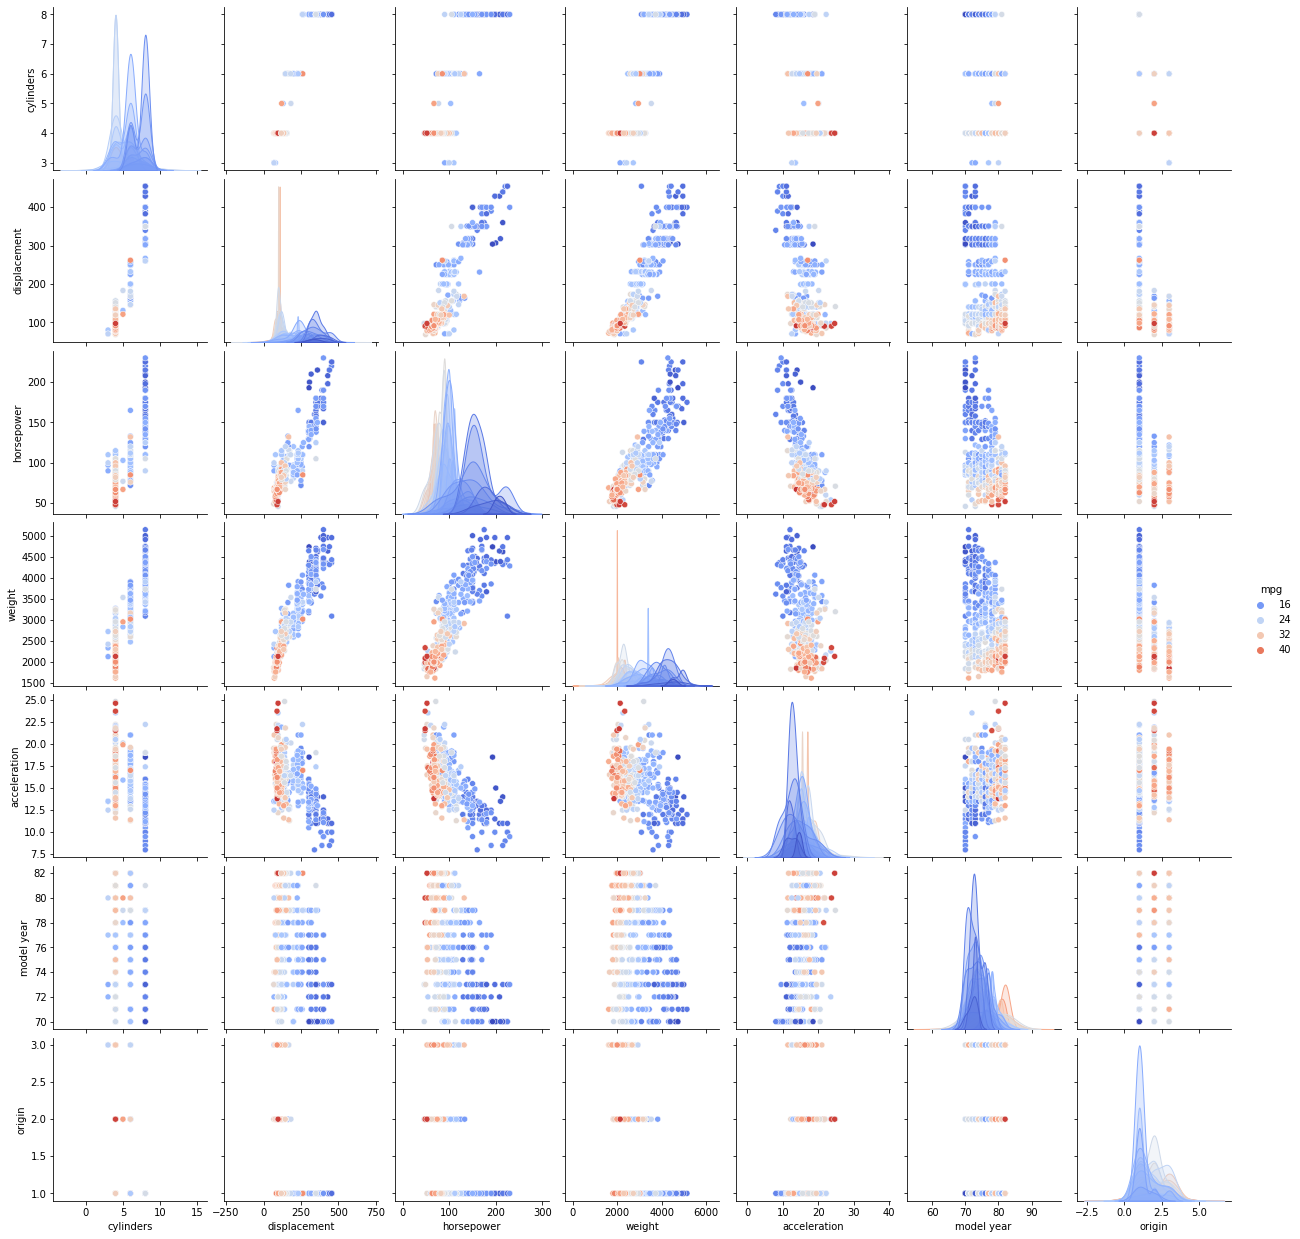

In [ ]:
sns.pairplot(dataset,hue = "mpg", palette='coolwarm')
warnings.simplefilter("ignore")

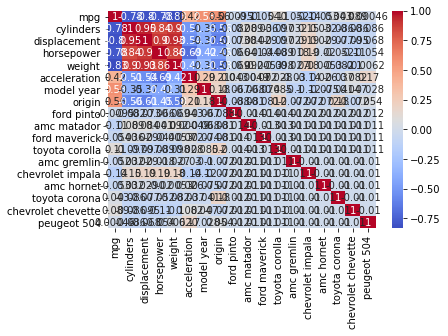

In [53]:
sns.heatmap(dataset.corr(),cmap='coolwarm',annot=True)


In [84]:
y = dataset['mpg']
X = dataset[['cylinders','displacement','horsepower','weight','model year','origin']]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=3)


In [89]:
X_train.shape

(278, 6)

In [90]:
X_test.shape

(120, 6)

In [92]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [94]:
model = LinearRegression()

In [95]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
y_pred = model.predict(X_test)

In [98]:
print(model.intercept_)

23.18741007194245


In [99]:
print(model.coef_)

[-1.12474606  3.41564815 -1.95678887 -5.15588574  2.60688005  1.35486497]


In [107]:
#Test data
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

RMSE: 3.780259069312159
MAE: 2.8912000635436876
MSE: 14.290358631116833


In [97]:
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

Training accuracy : 0.8233212463028151
Testing accuracy : 0.7825254717232005


In [112]:
joblib.dump(model, 'milege_car_prediction.pkl')

['milege_car_prediction.pkl']